In [1]:
import os
import matplotlib.pyplot as plt
import torch

from preprocess_images import get_image_embedding, load_image_embed, process_images_to_embeddings


In [2]:
# Load the CLIP model and processor
model, processor = load_image_embed()

/Users/ilerisoy/anaconda3/envs/pg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
memorix_cropped_images_dir = '/Users/ilerisoy/Vlisco data/Data Folders Cropped/memorix'
website_cropped_images_dir = '/Users/ilerisoy/Vlisco data/Data Folders Cropped/website_photoshoot'
vintage_model_cropped_images_dir = '/Users/ilerisoy/Vlisco data/Data Folders Cropped/vintage_model_photoshoot'
fashion_images_0 = "/Users/ilerisoy/Vlisco data/Data Folders Cropped/fashion_images_0_short_short/"
fashion_images_1 = "/Users/ilerisoy/Vlisco data/Data Folders Cropped/fashion_images_1_short/"
possible_vlisco = "/Users/ilerisoy/Vlisco data/Data Folders Cropped/possible_vlisco/all"
not_vlisco = "/Users/ilerisoy/Vlisco data/Data Folders Cropped/not_vlisco/"
masked_designs = "/Users/ilerisoy/Vlisco data/Masked Design Images Short/"

In [ ]:
# # Process images and save embeddings
# memorix_image_embeddings = process_images_to_embeddings(memorix_cropped_images_dir, model, processor)
# website_image_embeddings = process_images_to_embeddings(website_cropped_images_dir, model, processor)
# vintage_image_embeddings = process_images_to_embeddings(vintage_model_cropped_images_dir, model, processor)
# fashion_image_embeddings = process_images_to_embeddings(fashion_images_0, model, processor)
# fashion_image_1_embeddings = process_images_to_embeddings(fashion_images_1, model, processor)
# possible_vlisco_embeddings = process_images_to_embeddings(possible_vlisco, model, processor)
# not_vlisco_embeddings = process_images_to_embeddings(not_vlisco, model, processor)

# masked_designs_embeddings = process_images_to_embeddings(masked_designs, model, processor)

# Load the embeddings from pt files
memorix_image_embeddings = torch.load("memorix_embeddings.pt")
website_image_embeddings = torch.load("website_photoshoot_embeddings.pt")
vintage_image_embeddings = torch.load("vintage_model_photoshoot_embeddings.pt")
fashion_image_0_embeddings = torch.load("fashion_images_0_short_short_embeddings.pt")
fashion_image_1_embeddings = torch.load("fashion_images_1_short_embeddings.pt")
possible_vlisco_embeddings = torch.load("possible_vlisco_embeddings.pt")
not_vlisco_embeddings = torch.load("not_vlisco_embeddings.pt")
masked_designs_embeddings = torch.load("masked_designs_embeddings.pt")

/var/folders/h2/0yz4qqt96pl7pfv1jmlkqfp40000gn/T/ipykernel_39921/2591230508.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  memorix_image_embeddings = torch.load("memor

In [5]:
print("Memorix embeddings shape:", memorix_image_embeddings.shape)
print("Website embeddings shape:", website_image_embeddings.shape)
print("Vintage model embeddings shape:", vintage_image_embeddings.shape)
print("Fashion images 0 embeddings shape:", fashion_image_0_embeddings.shape)
print("Fashion images 1 embeddings shape:", fashion_image_1_embeddings.shape)
print("Possible Vlisco embeddings shape:", possible_vlisco_embeddings.shape)
print("Not Vlisco embeddings shape:", not_vlisco_embeddings.shape)

Memorix embeddings shape: torch.Size([231, 768])
Website embeddings shape: torch.Size([43, 768])
Vintage model embeddings shape: torch.Size([437, 768])
Fashion images 0 embeddings shape: torch.Size([428, 768])
Fashion images 1 embeddings shape: torch.Size([447, 768])
Possible Vlisco embeddings shape: torch.Size([126, 768])
Not Vlisco embeddings shape: torch.Size([195, 768])


# t-SNE

In [6]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_embeddings_with_tsne(embedding_tensors, dataset_names, colors=None):
    """
    Visualize an arbitrary number of embedding tensors using t-SNE.

    Args:
        embedding_tensors (list of torch.Tensor): List of embedding tensors for each dataset.
        dataset_names (list of str): List of dataset names corresponding to the embeddings.
        colors (list of str, optional): List of colors for each dataset. If None, default colors are used.
    """
    # Combine all embeddings
    all_embeddings = torch.vstack(embedding_tensors)

    # Create labels for each dataset
    all_labels = np.concatenate([
        np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
    ])

    # Convert embeddings to numpy (if they are not already)
    all_embeddings_np = all_embeddings.cpu().numpy()

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    embeddings_2d = tsne.fit_transform(all_embeddings_np)
    
    # Save the t-SNE object using torch
    torch.save(tsne, 'tsne_model.pt')

    print("t-SNE model saved as tsne_model.pt")

    # Define default colors if not provided
    if colors is None:
        colors = ['black', 'blue', 'green', 'purple', 'red', 'cyan', 'orange', 'yellow', 'magenta', 'pink']

    # Plot the results
    plt.figure(figsize=(10, 8))
    for label, color in zip(range(len(dataset_names)), colors):
        plt.scatter(
            embeddings_2d[all_labels == label, 0],
            embeddings_2d[all_labels == label, 1],
            c=color,
            label=f'{dataset_names[label]}',
            alpha=0.6
        )
    plt.title('t-SNE Visualization of Embedding Space Overlap')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.show()

    return all_embeddings, all_labels, embeddings_2d

t-SNE model saved as tsne_model.pt


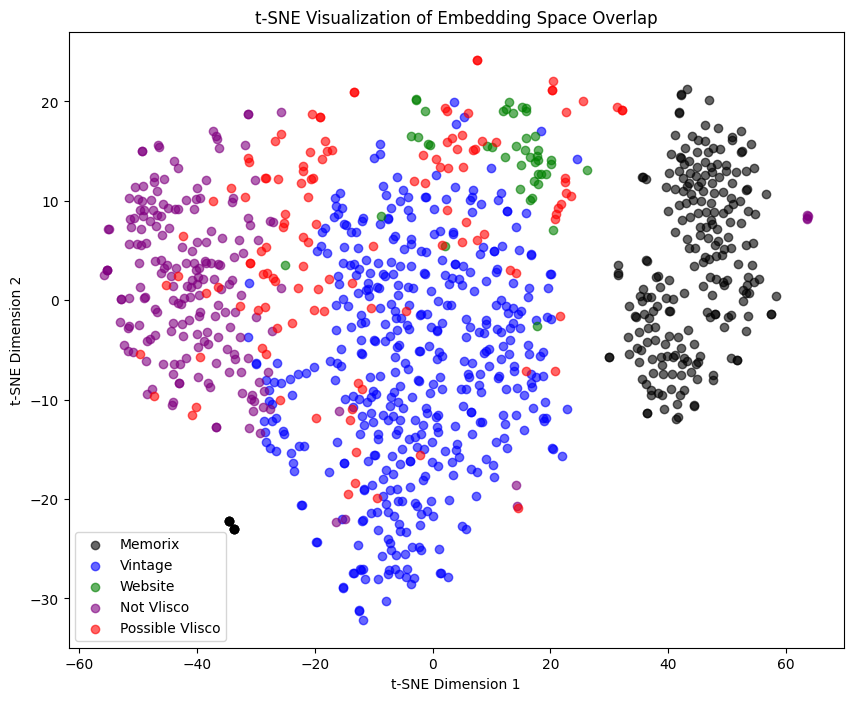

In [7]:
# List of embedding tensors and corresponding dataset names
# embedding_tensors = [memorix_image_embeddings, website_image_embeddings, vintage_image_embeddings, fashion_image_0_embeddings, fashion_image_1_embeddings, possible_vlisco_embeddings_week_10, possible_vlisco_embeddings_week_11, not_vlisco_embeddings, possible_vlisco_embeddings]
# dataset_names = ['Memorix', 'Website', 'Vintage', 'Fashion Plain', 'Fashion Intricate', 'Possible Vlisco Week 10', 'Possible Vlisco Week 11', 'Not Vlisco', 'Possible Vlisco']

embedding_tensors = [memorix_image_embeddings, vintage_image_embeddings, website_image_embeddings, not_vlisco_embeddings, possible_vlisco_embeddings]
dataset_names = ['Memorix', 'Vintage', 'Website', 'Not Vlisco', 'Possible Vlisco']


# Call the function
all_embeddings, all_labels, embeddings_2d_tsne = visualize_embeddings_with_tsne(embedding_tensors, dataset_names)

# # Assuming embedding_tensors is a list of tensors and dataset_names is a list of names
# selected_indices = [0, 2, 5, 6, 7, 8]
# selected_embeddings = [embedding_tensors[i] for i in selected_indices]
# selected_labels = [dataset_names[i] for i in selected_indices]

# # Now you can pass the selected embeddings and labels to your function
# all_embeddings, all_labels = visualize_embeddings_with_tsne(all_embeddings, all_labels)

# U-map

/Users/ilerisoy/anaconda3/envs/pg/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


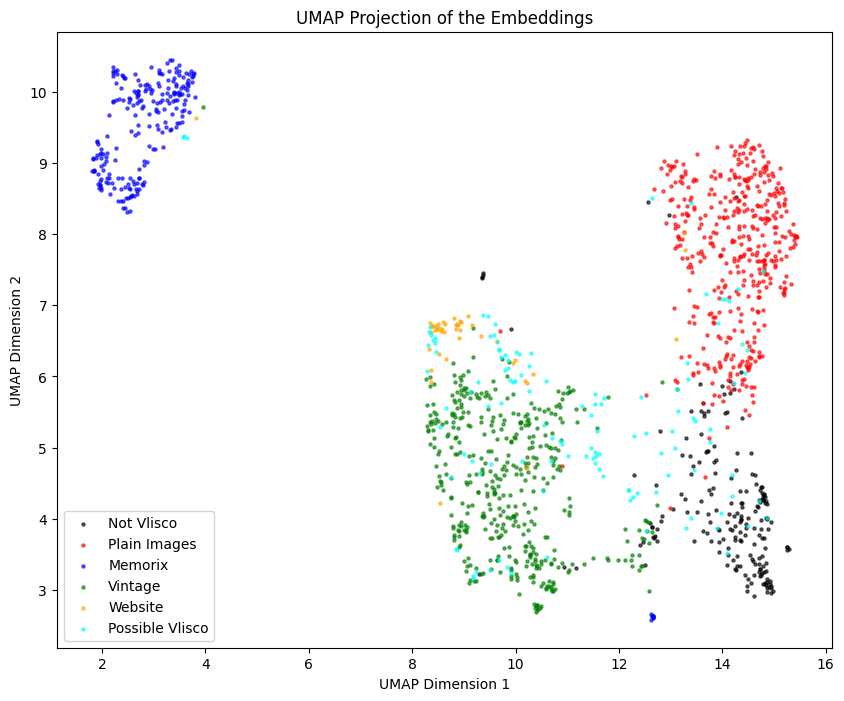

In [34]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

# Example embedding tensors and labels (replace with your actual data)
# all_embeddings is a stacked tensor of embeddings from multiple datasets
# all_labels is a numpy array of labels indicating which dataset each embedding belongs to

embedding_tensors = [not_vlisco_embeddings, fashion_image_0_embeddings, memorix_image_embeddings, vintage_image_embeddings, website_image_embeddings, possible_vlisco_embeddings]
dataset_names = ['Not Vlisco', 'Plain Images', 'Memorix', 'Vintage', 'Website', 'Possible Vlisco']

# Combine all embeddings
all_embeddings = torch.vstack(embedding_tensors)

# Create labels for each dataset
all_labels = np.concatenate([
    np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
])

# Apply UMAP
umap_reducer = umap.UMAP(random_state=42)
embeddings_2d_umap = umap_reducer.fit_transform(all_embeddings.cpu().numpy())


# umap_reducer = torch.load('umap_model_original.pt')
# embeddings_2d_umap = umap_reducer.transform(all_embeddings.cpu().numpy())

# Define colors for each dataset
colors = ['black', 'red', 'blue', 'green', 'orange', 'cyan', 'purple', 'yellow', 'magenta', 'pink']

# Plot the results with color information
plt.figure(figsize=(10, 8))
for label, color in zip(np.unique(all_labels), colors):
    plt.scatter(
        embeddings_2d_umap[all_labels == label, 0],
        embeddings_2d_umap[all_labels == label, 1],
        c=color,
        label=f'{dataset_names[label]}',
        s=5,
        alpha=0.6
    )
plt.title('UMAP Projection of the Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()

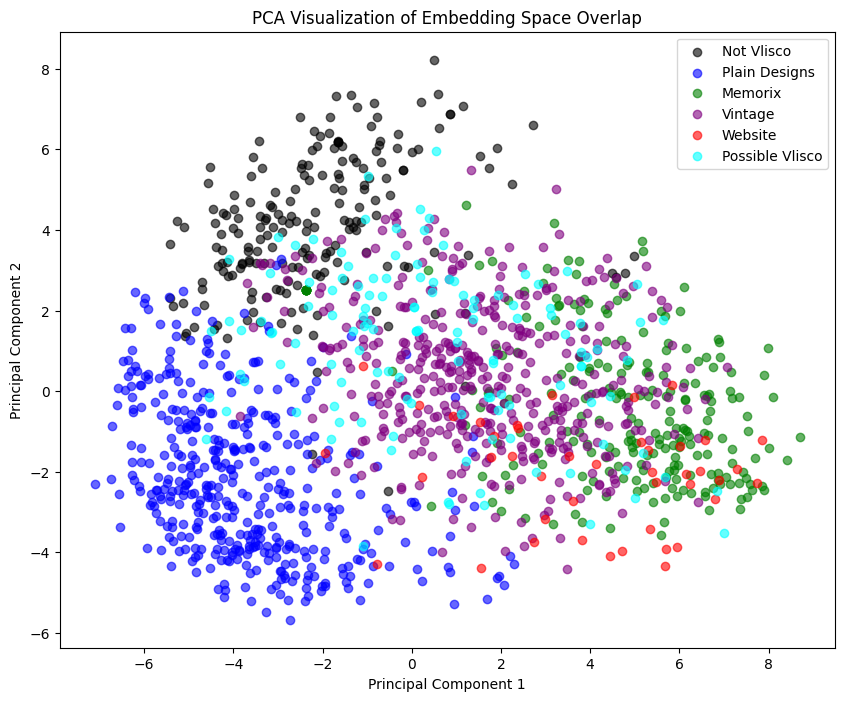

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_embeddings_with_pca(embedding_tensors, dataset_names, colors=None):
    """
    Visualize an arbitrary number of embedding tensors using PCA.

    Args:
        embedding_tensors (list of torch.Tensor): List of embedding tensors for each dataset.
        dataset_names (list of str): List of dataset names corresponding to the embeddings.
        colors (list of str, optional): List of colors for each dataset. If None, default colors are used.
    """
    # Combine all embeddings
    all_embeddings = torch.vstack(embedding_tensors)

    # Create labels for each dataset
    all_labels = np.concatenate([
        np.full(embedding.shape[0], idx) for idx, embedding in enumerate(embedding_tensors)
    ])

    # Convert embeddings to numpy (if they are not already)
    all_embeddings_np = all_embeddings.cpu().numpy()

    # Apply PCA
    pca = PCA(n_components=2, random_state=42)  # Reduce to 2 dimensions
    embeddings_2d = pca.fit_transform(all_embeddings_np)

    # Define default colors if not provided
    if colors is None:
        colors = ['black', 'blue', 'green', 'purple', 'red', 'cyan', 'orange', 'yellow', 'magenta', 'pink']

    # Plot the results
    plt.figure(figsize=(10, 8))
    for label, color in zip(range(len(dataset_names)), colors):
        plt.scatter(
            embeddings_2d[all_labels == label, 0],
            embeddings_2d[all_labels == label, 1],
            c=color,
            label=f'{dataset_names[label]}',
            alpha=0.6
        )
    plt.title('PCA Visualization of Embedding Space Overlap')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

    return embeddings_2d

# Call the function
embeddings_2d_pca = visualize_embeddings_with_pca(embedding_tensors, dataset_names)

# Confusion Matrix Analysis

In [14]:
# Dictionary to assign binary labels to embeddings
label_dict = {
    memorix_image_embeddings: 1,
    vintage_image_embeddings: 1,
    website_image_embeddings: 1,
    possible_vlisco_embeddings: 1,
    not_vlisco_embeddings: 0,
    # masked_designs_embeddings: 1
}

In [28]:
# Assuming all_labels is a list of labels
true_classes = np.array([0 if label == 0 or label == 1 else 1 for label in all_labels])

print(true_classes)

[0 0 0 ... 1 1 1]


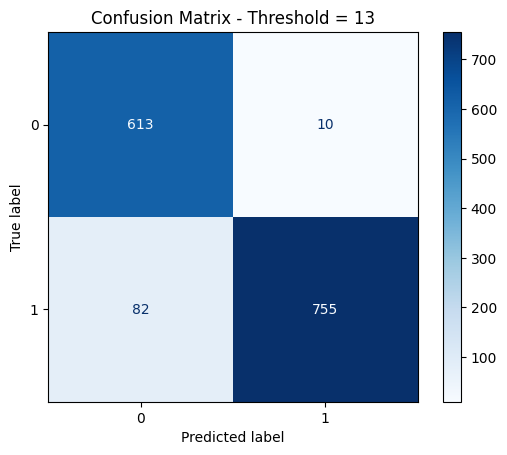

Model (Threshold = 12)
Accuracy: 0.9370
Precision: 0.9869
Recall: 0.9020
F1 Score: 0.9426
----------------------------------------


In [31]:
threshold = 12

predicted_labels = np.zeros_like(true_classes)
for i in range(len(embeddings_2d_umap)):
    dim_1 = embeddings_2d_umap[i, 0]
    if dim_1 < threshold:
        predicted_labels[i] = 1
    else:
        predicted_labels[i] = 0

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
)

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - Threshold = {threshold+1}")
plt.show()

# Print metrics at the specified threshold
accuracy = accuracy_score(true_classes, predicted_labels)
precision = precision_score(true_classes, predicted_labels)
recall = recall_score(true_classes, predicted_labels)
f1 = f1_score(true_classes, predicted_labels)

print(f"Model (Threshold = {threshold})")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("-" * 40)

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Apply K-means clustering to the embeddings
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_tsne = KMeans(n_clusters=2, random_state=42)

# Fit and predict clusters
pca_clusters = kmeans_pca.fit_predict(embeddings_2d_pca)
tsne_clusters = kmeans_tsne.fit_predict(embeddings_2d_tsne)

# Compute silhouette scores
silhouette_pca = silhouette_score(embeddings_2d_pca, pca_clusters)
silhouette_tsne = silhouette_score(embeddings_2d_tsne, tsne_clusters)

print(f"Silhouette Score (PCA): {silhouette_pca}")
print(f"Silhouette Score (t-SNE): {silhouette_tsne}")

Silhouette Score (PCA): 0.542671263217926
Silhouette Score (t-SNE): 0.5752452611923218


/Users/ilerisoy/anaconda3/envs/pg/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ilerisoy/anaconda3/envs/pg/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
from sklearn.manifold import trustworthiness

all_embeddings_np = all_embeddings.cpu().numpy()

# Compute trustworthiness scores
trustworthiness_pca = trustworthiness(all_embeddings_np, embeddings_2d_pca, n_neighbors=10)
trustworthiness_tsne = trustworthiness(all_embeddings_np, embeddings_2d_tsne, n_neighbors=10)

print(f"Trustworthiness (PCA): {trustworthiness_pca}")
print(f"Trustworthiness (t-SNE): {trustworthiness_tsne}")

Trustworthiness (PCA): 0.822567991821405
Trustworthiness (t-SNE): 0.9422219966502563


In [13]:
from dcor import distance_correlation

# Compute pairwise distances in the original and reduced spaces
from scipy.spatial.distance import pdist, squareform

original_distances = pdist(all_embeddings_np)
pca_distances = pdist(embeddings_2d_pca)
tsne_distances = pdist(embeddings_2d_tsne)

# Compute distance correlation
distance_corr_pca = distance_correlation(original_distances, pca_distances)
distance_corr_tsne = distance_correlation(original_distances, tsne_distances)

print(f"Distance Correlation (PCA): {distance_corr_pca}")
print(f"Distance Correlation (t-SNE): {distance_corr_tsne}")

Distance Correlation (PCA): 0.7384478155249163
Distance Correlation (t-SNE): 0.6545091836173589
